This notebook uses the same code from the "04 - Measuring audio quality" noteboook to analyze 80 files from the Sir George Williams Poetry Series SpokenWeb collection. Manual alignment of the files helped make the referenced metadata csv.

https://gist.github.com/3aef1f2c68ea06296e61bc0bc0ffe037

If you hover over the points in the visualization, it shows the author and some additional data; clicking on it takes you to the spokenweb page for the recording. The SpokenWeb pages do list a "quality" attribute (populated manually) that seems to correlate quite well with the audio analysis used in these notebooks.  (Opper is a great example.)  The result is that automating some tedious annotator tasks can be accomplished.

[Note: Getting the notebook to run is a little tricky, mainly because altair has some quirky dependency interactions with different environments.]


In [16]:
import pandas as pd  # needed to parse analysis data
import altair as alt  # needed for visualization
import os  # needed for audio path manipulation
import urllib

In [17]:
data = pd.read_csv('quality_examples/audio_quality.csv', index_col=0)
metadata = pd.read_csv('spokenweb metadata.csv')[['author', 'date', 'url', 'year', 'filename']]

In [18]:
data = data.merge(metadata, on='filename')

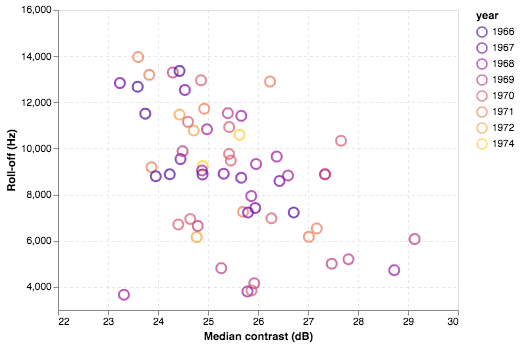

In [19]:
alt.renderers.enable('notebook')
chart = alt.Chart(data).mark_point(size=100).encode(
    alt.X('contrast_50:Q',
        scale=alt.Scale(zero=False, domain=(22, 30)),
        axis=alt.Axis(title='Median contrast (dB)')
    ),
    alt.Y('rolloff_75:Q',
        scale=alt.Scale(zero=False, domain=(3000, 16000)),
        axis=alt.Axis(title='Roll-off (Hz)')
    ),
    tooltip=['author', 'date', 'contrast_25', 'contrast_50', 'contrast_75'],
    href='url',
    color=alt.Color('year:O', scale=alt.Scale(scheme='plasma'))
).configure_axis(gridDash=(2, 4))

chart